### Exercici 1
#### Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [1]:
import numpy as np #library for scientific computing
import pandas as pd #library for dataframes 
import matplotlib.pyplot as plt #graphic library
import seaborn as sns #advanced graphic library based on matplotlib
import statistics #library for statistics
import warnings #library to manage warnings

warnings.filterwarnings('ignore')

In [2]:
#we obtain the dataset from Kaggle (https://www.kaggle.com/rajeevw/ufcdata)
#the dataset is about UFC-Fight historical data from 1993 to 2021. UFC is a Mixed Martial Arts USA league.

df_ufc = pd.read_csv('ufc.csv') 

df_ufc.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [3]:
print("Shape (rows x columns): " + str(df_ufc.shape))
print("Dimensions: " + str(df_ufc.ndim))
print("Columns: " + str(df_ufc.columns))
print('Nan values per variable:\n' + str(df_ufc.isna().sum()))

Shape (rows x columns): (6012, 144)
Dimensions: 2
Columns: Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age'],
      dtype='object', length=144)
Nan values per variable:
R_fighter         0
B_fighter         0
Referee          32
date              0
location          0
               ... 
R_Height_cms      4
R_Reach_cms     406
R_Weight_lbs      2
B_age           172
R_age            63
Length: 144, dtype: int64


In [4]:
#there are 6012 observations (fights) and 144 variables. There are too many variables (columns).
#We select some columns, only for red corner
df_ufc_short = df_ufc[['R_fighter', 'B_fighter', 'date', 'location', 'Referee', 'Winner','title_bout', 'weight_class', 
                       'R_age', 'R_wins', 'R_losses', 'R_Stance', 'R_Height_cms', 'R_Reach_cms',  
                       'R_win_by_Decision_Majority', 'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission','R_win_by_TKO_Doctor_Stoppage']]


In [5]:
print("Types of objects:\n" + str(df_ufc_short.dtypes))
#types of each variable

Types of objects:
R_fighter                        object
B_fighter                        object
date                             object
location                         object
Referee                          object
Winner                           object
title_bout                         bool
weight_class                     object
R_age                           float64
R_wins                            int64
R_losses                          int64
R_Stance                         object
R_Height_cms                    float64
R_Reach_cms                     float64
R_win_by_Decision_Majority        int64
R_win_by_Decision_Split           int64
R_win_by_Decision_Unanimous       int64
R_win_by_KO/TKO                   int64
R_win_by_Submission               int64
R_win_by_TKO_Doctor_Stoppage      int64
dtype: object


Explanation of the dataframe:

Each observation represents a fight.

An R or a B before the description is refering to Red (R) or Blue (B) corner. 
Red corner usually is for the favorite fighter or with the most recognized name.
Blue corner usually is for the underdog or the less recognized name

In [6]:
#we use the variable R_age to calculate different statistics measurements:

#before that, we delete observations with NaN values in R_age
df_ufc_nonan = df_ufc_short.dropna(subset = ['R_age'])

#mode (it is the number which appears most often)
print("the mode for the variable 'Age' is:")
print(statistics.mode(df_ufc_nonan['R_age']))

#median (it is the "middle" number of a sorted list of numbers)
print("\nthe median for the variable 'Age' is:")
print(statistics.median(df_ufc_nonan['R_age']))

#arithmetic mean (it is the average of the numbers)
print("\nthe arithmetic mean for the variable 'Age' is:")
print(round(statistics.mean(df_ufc_nonan['R_age']),2))

#standard deviation (it is a measure of how spread out numbers are from the mean)
print("\nthe standard deviation for the variable 'Age' is:")
print(round(statistics.stdev(df_ufc_nonan['R_age']),2))


the mode for the variable 'Age' is:
30.0

the median for the variable 'Age' is:
29.0

the arithmetic mean for the variable 'Age' is:
29.6

the standard deviation for the variable 'Age' is:
4.17


### Exercici 2
#### Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 


Correlation between two variables using the Pearson method:
0.8931387842068489

Correlation between two variables using the Spearman's method:
0.8880636179403244

Correlation between two variables using the Kendall's method:
0.7576219914776618


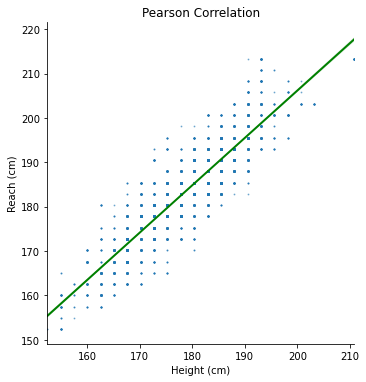

In [7]:
#we select the variable R_reach and R_height to calculate correlation
#reach is measured from the fingertips of the middle finger of one outstretched arm to the other

#to calculate correlation using the pandas method
print("\nCorrelation between two variables using the Pearson method:")
print(df_ufc_short['R_Height_cms'].corr(df_ufc_short['R_Reach_cms']))                  

#pandas method it also allows Spearman's correlation
print("\nCorrelation between two variables using the Spearman's method:")
print(df_ufc_short['R_Height_cms'].corr(df_ufc_short['R_Reach_cms'], method='spearman'))

#pandas method it also allows Kendall's correlation
print("\nCorrelation between two variables using the Kendall's method:")
print(df_ufc_short['R_Height_cms'].corr(df_ufc_short['R_Reach_cms'], method='kendall'))

fig = sns.lmplot(x='R_Height_cms', y='R_Reach_cms', data=df_ufc_short, scatter_kws={'s': 0.8, 'alpha': 0.5}, line_kws={'lw': 2, 'color': 'green'})
fig.set(title='Pearson Correlation', xlabel='Height (cm)', ylabel='Reach (cm)')


### Exercici 3
#### Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

,title_bout,R_age,R_wins,R_losses,R_Height_cms,R_Reach_cms,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage
title_bout,1.000000,0.006207,0.149331,-0.110076,0.004768,0.019804,0.028394,0.008981,0.110314,0.154448,0.058763,0.050199
R_age,0.006207,1.000000,0.439952,0.476606,0.075446,0.080481,0.104762,0.209705,0.313499,0.381431,0.201128,0.130559
R_wins,0.149331,0.439952,1.000000,0.707860,0.074197,0.112914,0.167053,0.426108,0.778426,0.754572,0.572843,0.269566
R_losses,-0.110076,0.476606,0.707860,1.000000,0.015435,0.033446,0.099466,0.399338,0.513148,0.533638,0.406339,0.207236
R_Height_cms,0.004768,0.075446,0.074197,0.015435,1.000000,0.893139,0.104123,-0.120690,-0.097630,0.222057,0.060497,0.029378
R_Reach_cms,0.019804,0.080481,0.112914,0.033446,0.893139,1.000000,0.122253,-0.110271,-0.066384,0.246020,0.080217,0.070958
R_win_by_Decision_Majority,0.028394,0.104762,0.167053,0.099466,0.104123,0.122253,1.000000,0.055443,0.034859,0.175855,0.034003,0.019564
R_win_by_Decision_Split,0.008981,0.209705,0.426108,0.399338,-0.120690,-0.110271,0.055443,1.000000,0.349034,0.179900,0.062380,0.039536
R_win_by_Decision_Unanimous,0.110314,0.313499,0.778426,0.513148,-0.097630,-0.066384,0.034859,0.349034,1.000000,0.372611,0.278257,0.112113
R_win_by_KO/TKO,0.154448,0.381431,0.754572,0.533638,0.222057,0.246020,0.175855,0.179900,0.372611,1.000000,0.165029,0.218145


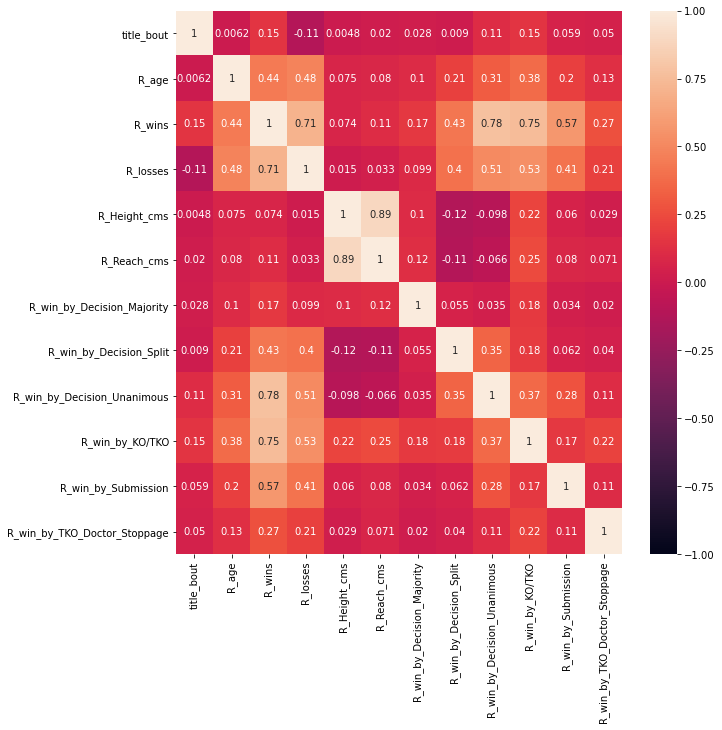

In [8]:
#atributs that are NaN values or not numbers (objects, string,...) are not represented
corr = df_ufc_short.corr()
display(corr)

plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

### Exercici 4
#### Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

In [9]:
#The Geometric Mean is a special type of average where we multiply n numbers together and then take a n root
#The Geometric Mean is useful when we want to compare things with very different properties.

print("\nthe geometric mean for the variable 'Age' is:")
print(round(statistics.geometric_mean(df_ufc_nonan['R_age']),2))

#the harmonic mean is the reciprocal of the arithmetic mean of the reciprocals of a given set of observations
#Usually used in situations when average rates are desired
#the harmonic mean is good at handling large outliers

print("\nthe harmonic mean for the variable 'Age' is:")
print(round(statistics.harmonic_mean(df_ufc_nonan['R_age']),2))



the geometric mean for the variable 'Age' is:
29.31

the harmonic mean for the variable 'Age' is:
29.02
